In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# Fig 1 (a)

In [2]:
N = 3000
L = 70
a = 1.66
dt = 0.01
T = 100
steps = int(T/dt)
L_half = L/2
D = 1
A = L**2 - (np.pi * (a**2))

In [3]:
def initialize_position(N):
    x = np.random.uniform(-L_half,L_half,N)
    y = np.random.uniform(-L_half,L_half,N)

    r = np.hypot(x,y)
    mask = r < a
    while sum(mask) > 0:
        x[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
        y[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
        r = np.hypot(x,y)
        mask = r < a

    return x , y

In [4]:
bins = np.linspace(0,35,105)
centres = 0.5*(bins[:-1] + bins[1:])
dr = bins[1] - bins[0]
area = 2 * np.pi * centres * dr
particle_count = np.zeros(len(bins) - 1)

In [5]:
x , y = initialize_position(N)

for step in range(steps):
    x += np.sqrt(2*D*dt) * np.random.randn(N)
    y += np.sqrt(2*D*dt) * np.random.randn(N)
    
    x = (x + L_half) % L - L_half
    y = (y + L_half) % L - L_half

    r = np.hypot(x , y)
    mask = r < a
    while np.sum(mask) > 0:
        x[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
        y[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
        r = np.hypot(x,y)
        mask = r < a
    
    if step > 0.2*steps and step % 10 == 0:
        r = np.hypot(x , y)
        hist , _ = np.histogram(r , bins = bins)
        particle_count += hist


sample_size = 0.8*steps/10
rho_bar = N/A
rho_r = particle_count / (sample_size * area)
rho_num_norm = rho_r / rho_bar

In [7]:
def s_of_b(b):
    return (2*np.pi*D*b)/(A + (np.pi*a**2))

def rho_an(r, b):
    s = s_of_b(b)
    return b*np.log(r/a) - (s/(4*D))*(r**2 - a**2)

def constraint(b):
    rpts = np.linspace(a, L_half, 5001)
    vals = rho_an(rpts, b)
    integral = 2*np.pi*np.trapz(rpts*vals, dx = rpts[1] - rpts[0])
    return integral/A - rho_bar

rho_bar = N/A
b_star = brentq(constraint ,-10*rho_bar ,10*rho_bar )

rho_anal = rho_an(centres, b_star)
rho_anal_norm = rho_anal / rho_bar

In [8]:
l = rho_anal_norm
rho_anal_norm = []
for ele in l:
    if ele < 0:
        rho_anal_norm.append(0)
    else:
        rho_anal_norm.append(ele)

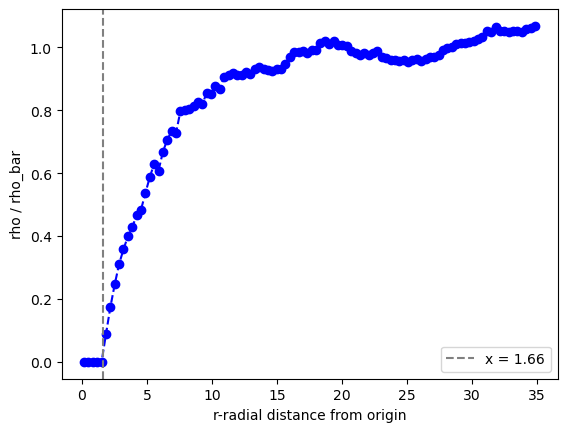

In [9]:
plt.plot(centres , rho_num_norm , 'o--' , color = 'blue')
# plt.plot(centres , rho_anal_norm , ls = '-' , color = 'black')
plt.axvline(x = a , ls = '--' , color = 'grey' , label = 'x = 1.66')
# plt.grid(True)
plt.xlabel('r-radial distance from origin')
plt.ylabel('rho / rho_bar')
plt.legend();

# Fig 1 (b)

In [10]:
N = 3000
L = 70
r = 1
a = 1.66
dt = 0.01
T = 100
steps = int(T/dt)
L_half = L/2
A = L**2 - (np.pi * (a**2))

In [11]:
rho_bar_profile = np.linspace(0.1,1.3,15)
D_profile = np.array([1,4,7,9,12,15,20])

In [12]:
J_by_D = np.zeros((len(D_profile) , len(rho_bar_profile)))
row = 0

In [13]:
for d in D_profile:
    column = 0
    for rho_bar in rho_bar_profile:
        
        j0_val = 0
        N = int((70**2 - (np.pi*(1.66**2))) * rho_bar)
        x , y = initialize_position(N)
        
        for step in range(1,steps+1):
            
            x += np.sqrt(2*d*dt) * np.random.randn(N)
            y += np.sqrt(2*d*dt) * np.random.randn(N)
    
            x = (x + L_half) % L - L_half
            y = (y + L_half) % L - L_half

            r = np.hypot(x , y)
            mask = r < a
            j0_val += np.sum(mask)
       
            while np.sum(mask) > 0:
                x[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
                y[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
                r = np.hypot(x,y)
                mask = r<a  
            
        J_by_D[row , column] = j0_val/d
        
        column += 1
    row += 1

J_by_D /= 100

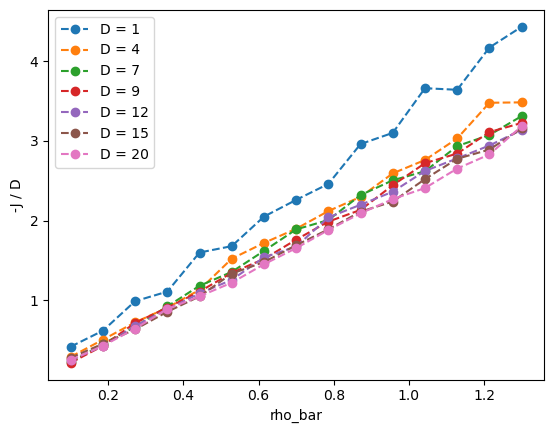

In [15]:
for i in range(1,8):
    plt.plot(rho_bar_profile , J_by_D[i-1] ,'o--', label = f'D = {D_profile[i-1]}')
plt.xlabel('rho_bar')
plt.ylabel('-J / D')
plt.legend();